##### Concurrency 2022/2023 - Computer Science
## Lecture 1 - Introduction to Quantum Computing using Qiskit

by André Sequeira at andresequeira401@gmail.com

<img src="https://miro.medium.com/max/2400/0*yUz39magP61kj3MR.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">


##### There are many more quantum computing companies nowadays 

<img src="images/qc_companies.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">



* Google - Circ
* Microsoft - Azure quantum
* Xanadu - Pennylane 
  
...


## Contents
0. [Installation](#inst)
1. [Postulates of quantum mechanics](#postulates)
   * [State space](#statespace)
   * [Evolution](#evolution)
   * [Measurement](#Measurement)
   * [Composite systems](#composite)
3. [Single-qubit gates](#single_operations)
4. [Multi-qubit gates](#multi_op)

## 0. Installation  <a id='inst'></a>

1. Create python virtual environment (Anaconda , venv...)
   
2. If anaconda -> Open terminal and type:
   
   1. create virtual environment: 
      <p> conda create -n NAME_OF_YOUR_ENVIRONMENT python=3.9 </p>
   2. Activate environment: 
      <p> conda activate NAME_OF_YOUR_ENVIRONMENT </p>
   3. Install qiskit: 
      <p> pip install qiskit </p>

   If venv -> Open terminal and type:

   4. create virtual environment: 
      <p> python3 -m venv NAME_OF_YOUR_ENVIRONMENT </p>
   5. Activate environment:
      <p> source activate  NAME_OF_YOUR_ENVIRONMENT/bin/activate (see exact activation mode for your operating system) </p>
   6. Install qiskit: 
      <p> pip install qiskit </p>

3. If you want to use Qiskit labs, or run your quantum circuits on real quantum hardware, you need to create an account in [IBM Q Experience](https://quantum-computing.ibm.com/). Otherwise, if just use the simulator, then you can simply use the local installation of qiskit.

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

&nbsp;

## 1. Postulates of quantum mechanics <a id='postulates'></a>

### 1.1 State space
Associated with any isolated physical system is a complex vector space with an inner product (Hilbert Space) known as the **state space** of the system.

Hilbert space $$\mathbb{H} - \mathbb{C}^d$$

where $d=2^n$ with $n$ being the number of qubits of our quantum system.
The quantum bit, *qubit*, is the unit of information in a quantum computer. Any quantum system with two orthogonal states can be used to represent a qubit.

<img src="images/bits_qubits.png" alt="alt text" height=300, width="600"/>

The bit can only be in one of the two discrete states. The quantum bit can be in one of the two discrete states **or** any combination of the two states. Quantum computing is linear, thus a superposition, or linear combination of both states is a valid state of the system.

<img src="images/superposition.png" alt="alt text" height=350, width="500"/>

This means that the qubit can actually be in any combination of 0 and 1. For instance, a qubit can be 70% 0 and 30% 1, kinda... Qubits are not the same as probabilistic bits, why? Because they can have complex amplitudes that could interfere!

Actually, many people say that this is the power of quantum computing, but, only to an extent. **Superposition state is not a probabilistic mixture, both states happen at the same time**, but the real power of quantum computers come from physical processes like **interference** and **entanglement** which are impossible to recreate classically.

&nbsp;
### Dirac notation<a id='bra_ket'></a>

The bra–ket notation is a standard notation for describing quantum states.

- A *ket* $|u\rangle$ is a column vector, while a *bra* $\langle v |$ is a row vector.

- $| u \rangle$ and $ \langle u|$ are [Hermitian conjugates](https://en.wikipedia.org/wiki/Conjugate_transpose) of each other. 

This notation simplifies the representation of the scalar product of vectors, as well as the action of a linear operator on a vector and other operations over a complex vector space.

<div class="alert alert-block alert-info">
    
**Bra-ket as inner product of vectors**

Consider the ket vector $|u\rangle$  and $|v\rangle$ on a two-dimensional space:

$$
|u\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix};
\;\;
|v\rangle = 
\begin{pmatrix}
0 \\
1
\end{pmatrix};
$$

&nbsp;

Their respective conjugate transpose, $\langle u|$ and $\langle v|$, can be represented as row vectors:

&nbsp;

$$
\langle u| =  
\begin{pmatrix}
1 & 0
\end{pmatrix};
\;\;
\langle v | = 
\begin{pmatrix}
0 & 1
\end{pmatrix};
$$

&nbsp;

The inner product between $\langle v|$ and $|u\rangle$ is represented as $\langle v | u \rangle$:

&nbsp;

$$
\langle v | u \rangle =
\begin{pmatrix}
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 \\
0
\end{pmatrix} = 0 \, ;
$$

&nbsp;

Which indicates that the states are in fact orthogonal, thereby forming a basis in a two-dimensional space.
</div>

States 

$$
|u\rangle =  
\begin{pmatrix}
1 \\
0
\end{pmatrix} = |0\rangle;
\;\;
|v\rangle = 
\begin{pmatrix}
0 \\
1
\end{pmatrix} = |1\rangle;
$$

form the computational basis and a single qubit quantum state is generally described as $|\psi\rangle$ that can be written as a complex superposition of these basis states as:

$$|\psi\rangle = \alpha|0\rangle + \beta |1\rangle = \begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}$$

<img src="images/bloch_sphere.png" alt="alt text" height=400, width="550"/>



In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
from qiskit.tools.visualization import plot_histogram, plot_distribution
import matplotlib.pyplot as plt
import numpy as np

**Quantum registers** are used to create qubits. Take into account that the qubit always starts in state $|0\rangle$. 

**Classical registers** are used to measure the state of the qubits i.e. collapse the quantum state into a classical state.

In [3]:
qr = QuantumRegister(1,'q')
cr = ClassicalRegister(1,'c')

A **quantum circuit** is defined by the quantum and classical registers created above

In [4]:
circuit1 = QuantumCircuit(qr,cr, name="qcircuit")

#or

n_qubits = 1
n_bits = 1
circuit2 = QuantumCircuit(n_qubits,n_bits, name="qcircuit")

One can also avoid creating explicitly the quantum/classical registers

In [5]:
qc = QuantumCircuit(1,1) 

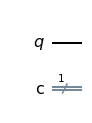

In [6]:
#you can draw the quantum circuit
qc.draw(output="mpl")

### 1.2 Evolution <a id='evolution'></a>

Usually the evolution of quantum systems is given by an operator $U$ s.t:
$$ |\psi'\rangle = U|\psi\rangle $$
Quantum evolution or operators are **unitary** this means that the computation is reversible because $UU^{\dagger}=I$. 

A gate acting on a single qubit is represented by a $2\times 2$ unitary matrix $U$ that can have complex entries. Evolution thus happens by linear algebra, simple matrix vector multiplication.

The most used single-qubit gates are the **Pauli gates** : 

$$
X   =  
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix}
;
\quad
Y  = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
;
\quad
Z = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}
$$

##### <span style="color: red;">EXERCISE 1:</span> - Apply the Pauli matrices to the computational basis states and see how state changes

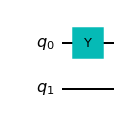

In [14]:
qc = QuantumCircuit(2)

qc.y(0)

qc.draw(output="mpl")

One of the most important single-qubit gates is the Hadamard gate, responsible for creating a *uniform* superposition state.

$$
H   =  \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1\\
1 & -1
\end{pmatrix}
$$

##### <span style="color: red;">EXERCISE 2:</span> - Apply the Hadamard matrix to the computational basis states and see how state changes. If we apply two Hadamards consecutively, what state do we get  ? 


##### <span style="color: red;">EXERCISE 3:</span> - What state do we get if we apply the following gates ? 
<img src="images/xhxh.png" alt="alt text" height=150, width="650"/>

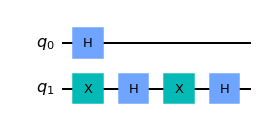

In [17]:
qc = QuantumCircuit(2)

qc.h(0)


qc.draw(output="mpl")

qc.x(1)
qc.h(1)
qc.x(1)
qc.h(1)

qc.draw(output="mpl")



### 1.3 Measurement

#### Execute using the qasm_simulator 

A measurement is composed by **projective operators** - measurements in the computational basis.

$$ M_0 = |0\rangle \langle 0| $$
$$ M_1 = |1\rangle \langle 1| $$

If the state of the system is an arbitrary state $|\psi\rangle$, then the probability of measuring each basis state $i$ is given by:

$$ P_i = \langle \psi| M_i | \psi\rangle $$ 
Thus, for an arbitrary superposition state $|\psi\rangle = \alpha|0\rangle + \beta |1\rangle$, we measure each basis state with probability:

$$p_0 = |\alpha|^2$$

$$p_1 = |\beta|^2$$

##### <span style="color: red;">EXERCISE 4:</span> - Prove that the probabilities of measuring each basis state are indeed what is represented above 

We can execute the circuit in two different ways:
* **state_vector_simulator** - Results the exact quantum state i.e the vector of complex amplitudes.
* **qasm_simulator** - Returns the quantum states measured after executing the circuit several times. Number of **shots**. 

In [18]:
statevector_backend = Aer.get_backend("statevector_simulator")
qasm_backed = Aer.get_backend("qasm_simulator")

#### Execute using the statevector simulator

In [19]:
qc = QuantumCircuit(1)

result = execute(qc, statevector_backend).result()
qstate= result.get_statevector(qc)
print(qstate)

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


Import the visualization tools:

In [20]:
from qiskit.visualization import *

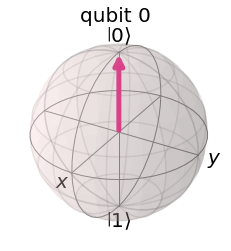

In [21]:
plot_bloch_multivector(qstate)

### Execute the quantum circuit in the qasm_simulator

In qiskit it is only possible to measure in the computational basis, using the measure function

In [22]:
qc = QuantumCircuit(1,1)

qc.measure(0,0)
#or circuit1.measure_all()

result = execute(qc, qasm_backed, shots=1024).result()
counts = result.get_counts()

print(counts)

{'0': 1024}


#### Plotting the counts

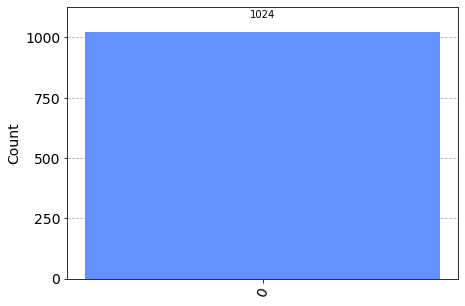

In [23]:
plot_histogram(counts)

### Plot probability distribution generated from measurements


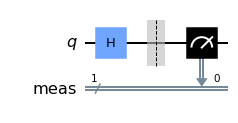

In [24]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()


qc.draw(output="mpl")

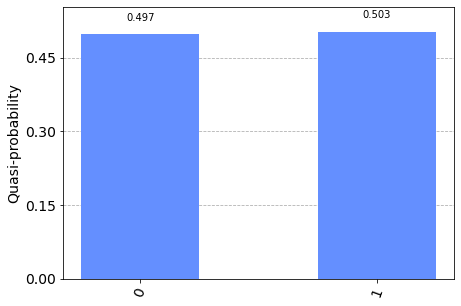

In [26]:
result = execute(qc, qasm_backed, shots=1024).result()
counts = result.get_counts()
#qstate= result.get_statevector(qc)
#plot_bloch_multivector(qstate)



plot_distribution(counts)


##### <span style="color: red;">Question:</span> - Why don't we get a uniform distribution ?

### Note on qiskit ordering of qubits 

Qiskit uses little-endian , left qubit is the most significant . Important for easy binary to decimal conversion. 

<p align="center">
  <img width="650" height="400" src="images/littleendian.png">
</p>


#### High level function for executing the circuit using qasm_simulator

In [27]:
def execute_circuit(qc, shots=1024, decimal=False, reversed=False):
    
    #define backend
    device = Aer.get_backend('qasm_simulator')
    #get counts
    counts = device.run(qc, shots=shots).result().get_counts()
    
    if decimal:
        if reversed:
            counts = dict((int(a[::-1],2),b) for (a,b) in counts.items())
        else:
            counts = dict((int(a,2),b) for (a,b) in counts.items())
    else:
        if reversed:
            counts = dict((a[::-1],b) for (a,b) in counts.items())
        else:
            counts = dict((a,b) for (a,b) in counts.items())

    return counts

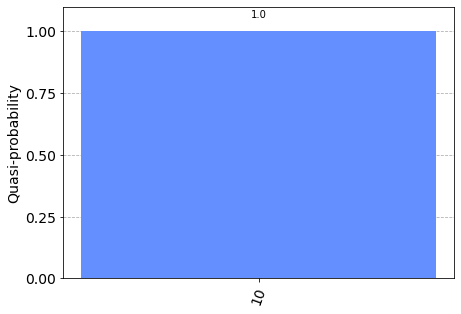

In [28]:
qc = QuantumCircuit(2)
qc.x(0)

qc.measure_all()

counts = execute_circuit(qc, reversed=True)

plot_distribution(counts)

##### <span style="color: red;">Question:</span> Is there any reason for using qasm_simulator instead or statevector ?


## 2 Single-qubit gates <a id='single_op'></a>

(Let qr being the quantum register and qc being the quantum circuit.)


|Gate Name|Syntax |Matrix|      
|-|-|-|
|Identity |qc.id(qr)|  $Id = \begin{bmatrix} 1&0\\0&1 \end{bmatrix}$|
|Bit-flip or Pauli-X| qc.x(qr)| $ X = \begin{bmatrix} 0&1\\1&0 \end{bmatrix}$|
|Bit and phase-flip or Pauli-Y| qc.y(qr)|$ Y = \begin{bmatrix} 0&-i\\i&0 \end{bmatrix}$|
|Phase-flip or Pauli-Z| qc.z(qr)| $Z = \begin{bmatrix} 1&0\\0&-1 \end{bmatrix}$|
|Hadamard|qc.h(qr)| $ H =\frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1\end{bmatrix}$|
|S or $\sqrt{Z}$-Phase|qc.s(qr)|$ S =\begin{bmatrix} 1 & 0 \\ 0 & i\end{bmatrix}$|
|$S^\dagger$ or conjugate $\sqrt{Z}$-Phase|qc.sdg(qr)| $S^\dagger =\begin{bmatrix} 1 & 0 \\ 0 & -i\end{bmatrix}$|
|T or $\sqrt{S}$-Phase|qc.t(qr)| $T=\begin{bmatrix}1 & 0 \\ 0 & e^{i \pi /\ 4}\end{bmatrix}$|
|$T^\dagger$ or conjugate $\sqrt{S}$-Phase|qc.tdg(qr)| $ T^\dagger =\begin{bmatrix}1 & 0 \\ 0 & e^{-i \pi /\ 4}\end{bmatrix}$|
|$R_y$ rotation gate |qc.ry(qr)| $ R_y(\theta) = \begin{bmatrix} cos(\frac{\theta}{2}) & -sin(\frac{\theta}{2}) \\ sin(\frac{\theta}{2}) & cos(\frac{\theta}{2})\end{bmatrix}$|
|$R_x$ rotation gate |qc.rx(qr)| $ R_x(\theta) = \begin{bmatrix} cos(\frac{\theta}{2}) & -isin(\frac{\theta}{2}) \\ isin(\frac{\theta}{2}) & cos(\frac{\theta}{2})\end{bmatrix}$|
|$R_z$ rotation gate |qc.rz(qr)| $ R_z(\theta) = \begin{bmatrix} e^{i\frac{\theta}{2}} & -0 \\ 0 & e^{-i\frac{\theta}{2}}\end{bmatrix}$|

##### <span style="color: red;">EXERCISE 5:</span>
Program a quantum circuit for each of the pauli gates and execute the circuit using qasm_simulator. 

What happens to the probabilities of our system once we apply these gates?

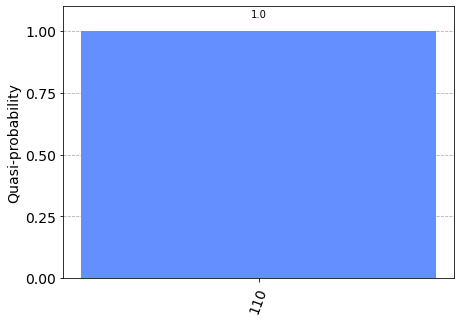

In [34]:
qc = QuantumCircuit(3)
qc.x(0)
qc.y(1)
qc.z(2)


qc.measure_all()

counts = execute_circuit(qc, reversed=True)

plot_distribution(counts)






### 1.4 Composite systems <a id="composite"></a>

Multi qubit states are represented via the tensor product:

$$
|q_0\rangle \otimes |q_1\rangle =  |q_0\rangle |q_1\rangle = |q_0 q_1\rangle
$$

&nbsp;

**Note**: The ordering convention adopted in Qiskit writes the first qubit of a circuit at the far right and adds each additional qubit on the left.

Most significant bit (MSB) on the left to the least significant bit (LSB) on the right (big-endian):

&nbsp;

$$ |q_n\rangle \otimes \cdots \otimes |q_1\rangle \otimes |q_0\rangle $$

&nbsp;

Keep in mind that this ordering may be different than quantum circuits and algorithms described in scientific literature, and needs to be taken into account when analysing results of multi-qubit measurements, or the algebraic description of multi-qubit operations and states.

<div class="alert alert-block alert-info">


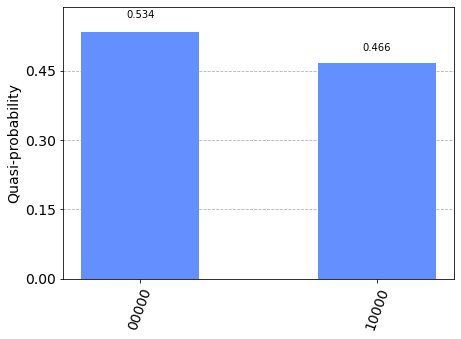

In [39]:
qc = QuantumCircuit(5)
qc.h(0)


qc.measure_all()

counts = execute_circuit(qc, reversed=True)

plot_distribution(counts)
#qc.draw(output="mpl")


Consider two non-entangled qubits of a quantum circuit, $q_a$ and $q_b$. Their joint-state description can be written in bra-ket notation, with the tensor product providing an algebraic description of the state.

&nbsp;

$$|q_a q_b\rangle = |q_a\rangle \otimes |q_b\rangle = 
\begin{pmatrix}
q_{a1} \\ 
q_{a2}
\end{pmatrix} \otimes
\begin{pmatrix}
q_{b1} \\ 
q_{b2}
\end{pmatrix} =
\begin{pmatrix}
q_{a1}.q_{b1} \\
q_{a1}.q_{b2} \\
q_{a2}.q_{b1} \\
q_{a2}.q_{b2}
\end{pmatrix}
$$

&nbsp;

Using the tensor product, we can determine the vector of an $n$-qubit basis state. For example:

&nbsp;

$$|10\rangle = |1\rangle \otimes |0\rangle = 
\begin{pmatrix}
0 \\ 
1
\end{pmatrix} \otimes
\begin{pmatrix}
1 \\ 
0
\end{pmatrix} = 
\begin{pmatrix}
0 \\ 
0 \\
1 \\
0
\end{pmatrix}
$$
</div>

The tensor product is used to derive multi qubit gates as well. 
&nbsp;

##### <span style="color: red;">Exercise 6:</span> In a 2-qubit system, how many basis states do we have? Represent the basis state vectors using the tensor product.

### Entanglement and Bloch sphere for multi-qubit states

&nbsp;

Since qubits can be entangled, multi-qubit states, in general, cannot be expressed by simply representing each qubit's Bloch sphere. This is because the dimension of the vector space rises exponentially with the number of qubits, to account for correlation between qubits. One attempt to visualize multi-qubit states is made [here](https://medium.com/qiskit/visualizing-bits-and-qubits-9af287047b28). 

**For a quantum system, its description is more than the sum of descriptions for each individual qubit.**

For instance, the superposition over two qubits is **not** an entangled state:

$$ |\psi\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

However, a Bell state **cannot** be decomposed by the state of individual qubits.

$$ |\psi\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$



##### <span style="color: red;">Question:</span> How much information can we represent with quantum computers if we don't measure the system?

That's all pretty and all, but once we measure the system, we lose all superposition terms, thus lose the exponential capacity of representing information. We can only read 1 bit of information at a time. Now, the real thing is not the superposition , but how do we collapse the state in something meaningful !!!

##### <span style="color: red;">EXERCISE 7:</span>
Program a quantum circuit applying the hadamard gate to 2 qubits initialized in the ground state. Execute the circuit using qasm_simulator and obtain the probability distribution


In [ ]:
### YOUR CODE HERE ###


##### <span style="color: red;">EXERCISE 8:</span>
Program a quantum circuit that applies a rotation in the y direction to the state $|1\rangle$ of $\theta=\frac{\pi}{2}$. Execute the circuit using qasm_simulator and plot the histogram


In [ ]:
### YOUR CODE HERE ###

&nbsp;

## 3 Multi-qubit gates <a id='multi_op'></a>

Multiqubit gates:

The matrix looks different from the rest of the bibliography because qiskit uses different definitions of least and most significant qubits.

Let control be the the 0 qubit and the target the 1 qubit.

|Gate Name|Syntax |Matrix|        
|-|-|-|
|Controlled-X or controlled-Not|qc.cx(qr\[control\],qr\[target\])|$CX = \begin{bmatrix}1&0&0&0\\0&0&0&1\\0&0&1&0\\0&1&0&0\end{bmatrix}$  |
|Controlled-Y|qc.cy(qr\[control\],qr\[target\])|$CY = \begin{bmatrix}1&0&0&0\\0&0&0&-i\\0&0&1&0\\0&i&0&0\end{bmatrix}$   |
|Controlled-Z or controlled-Phase|qc.cz(qr\[control\],qr\[target\])| $CZ =\begin{bmatrix}1&0&0&0\\0&1&0&0\\0&0&1&0\\0&0&0&-1\end{bmatrix}$  |
|Controlled-Hadamard|qc.ch(qr\[control\],qr\[target\])|$CH = \begin{bmatrix}1&0&0&0\\0&\frac{1}{\sqrt{2}}&0&\frac{1}{\sqrt{2}}\\0&0&1&0\\0&\frac{1}{\sqrt{2}}&0&-\frac{1}{\sqrt{2}}\end{bmatrix}$  |
|SWAP|qc.swap(qr\[control\],qr\[target\])| $SWAP =\begin{bmatrix}1&0&0&0\\0&0&1&0\\0&1&0&0\\0&0&0&1\end{bmatrix}$  |

&nbsp;

### CNOT gate 

The controlled-NOT (or controlled-$X$) gate allows for the creation of entanglement between two qubits in a quantum circuit. The CNOT gate's action on basis states is to flip, i.e. apply an $X$ gate to, the target qubit (denoted as $\oplus$ in quantum circuits) if the control qubit  (denoted as $\bullet$), is $|1\rangle$; otherwise the target qubit goes unchanged.

The matrix describing a CNOT depends on which qubit acts as control. For a state $|q_1 q_0\rangle$, if we apply a CNOT operation with $q_1$ as control, the matrix is described as:

$$
C_X = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}
$$

##### <span style="color: red;">EXERCISE 9:</span>
Prepare the Bell state:

$$ |\psi\rangle = \frac{1}{\sqrt{2}} \biggl( |0\rangle + |1\rangle \biggr) $$

Plot the circuit. Execute the circuit using qasm_simulator.

In [ ]:
### YOUR CODE HERE ###

### Toffoli gate 

The Toffoli gate is related to the classical AND and XOR operations in classical computing. 

$$
CC_X = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix} 
$$


##### <span style="color: red;">EXERCISE 10:</span>
Implement a circuit that applies a hadamard gate to the zero and first qubit, followed by a toffoli gate. Execute the circuit and plot the distribution

In [19]:
### YOUR CODE HERE ###

### Merging Circuits

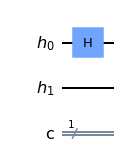

In [21]:
circuit = QuantumCircuit(qr,cr)
circuit.h(qr[0])
circuit.draw(output='mpl')

In [27]:
circuit_aux = QuantumCircuit(2,1)

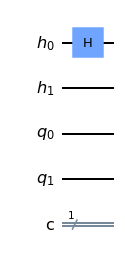

In [28]:
circuit = circuit.compose(circuit_aux)
circuit.draw(output='mpl')

DONE! Ciao for now :)